# Análisis de datos FIFA - Influencia del portero en rondas de penaltis

Estudiar la contribución y efectividad de los porteros durante las rondas de penaltis y determinar cuánto impactan en el resultado final de dichas rondas.

## Inicialización

In [1]:
# importar librerias
import pandas as pd
import numpy as np
import statistics as statistics
import matplotlib.pyplot as plt
import json
from scipy import stats as st

In [2]:
# cargar los datos - Irene
fifa = pd.read_csv('https://raw.githubusercontent.com/IreneRA/Hackaton-Tripleten/Raw-data/international_matches.csv')

In [3]:
# vista previa
fifa.head(5)

,date,home_team,away_team,home_team_continent,away_team_continent,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,...,shoot_out,home_team_result,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score
0,1993-08-08,Bolivia,Uruguay,South America,South America,59,22,0,0,3,...,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1993-08-08,Brazil,Mexico,South America,North America,8,14,0,0,1,...,No,Draw,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1993-08-08,Ecuador,Venezuela,South America,South America,35,94,0,0,5,...,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1993-08-08,Guinea,Sierra Leone,Africa,Africa,65,86,0,0,1,...,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1993-08-08,Paraguay,Argentina,South America,South America,67,5,0,0,1,...,No,Lose,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#información general
fifa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23921 entries, 0 to 23920
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   date                           23921 non-null  object 
 1   home_team                      23921 non-null  object 
 2   away_team                      23921 non-null  object 
 3   home_team_continent            23921 non-null  object 
 4   away_team_continent            23921 non-null  object 
 5   home_team_fifa_rank            23921 non-null  int64  
 6   away_team_fifa_rank            23921 non-null  int64  
 7   home_team_total_fifa_points    23921 non-null  int64  
 8   away_team_total_fifa_points    23921 non-null  int64  
 9   home_team_score                23921 non-null  int64  
 10  away_team_score                23921 non-null  int64  
 11  tournament                     23921 non-null  object 
 12  city                           23921 non-null 

Descripción de los datos de `fifa`:
-  `date`: fecha en que se llevó a cabo el partido.
-  `home_team`: equipo local o equipo que juega en casa.
-  `away_team`: equipo visitante.
-  `home_team_continent`: continente al que pertenece el equipo local.
-  `away_team_continent`: continente al que pertenece el equipo visitante.
-  `home_team_fifa_rank`: clasificación FIFA del equipo local en el momento del partido.
-  `away_team_fifa_rank`: clasificación FIFA del equipo visitante en el momento del partido.
-  `home_team_total_fifa_points`: puntos totales FIFA del equipo local en el momento del partido.
-  `away_team_total_fifa_points`: puntos totales FIFA del equipo visitante en el momento del partido.
-  `home_team_score`: goles anotados por el equipo local durante el partido.
-  `away_team_score`: goles anotados por el equipo visitante durante el partido.
-  `tournament`: torneo o competición en el que se lleva a cabo el partido.
-  `city`: ciudad en la que se realizó el partido.
-  `country`: país en el que se realizó el partido.
-  `neutral_location`: booleano (True/False) que indica si el partido se llevó a cabo en una ubicación neutral (es decir, no es el hogar de ninguno de los equipos).
-  `shoot_out`: indica si hubo una tanda de penaltis ("Sí" o "No").
-  `home_team_result`: resultado del equipo local (puede ser "Ganar", "Empatar" o "Perder").
-  `home_team_goalkeeper_score`: calificación del portero del equipo local.
-  `away_team_goalkeeper_score`: calificación del portero del equipo visitante.
-  `home_team_mean_defense_score`: calificación media de la defensa del equipo local.
-  `home_team_mean_offense_score`: calificación media del ataque del equipo local.
-  `home_team_mean_midfield_score`: calificación media del mediocampo del equipo local.
-  `away_team_mean_defense_score`: calificación media de la defensa del equipo visitante.
-  `away_team_mean_offense_score`: calificación media del ataque del equipo visitante.
-  `away_team_mean_midfield_score`: calificación media del mediocampo del equipo visitante.

In [5]:
# convertir la columna 'date' a datetime
fifa['date'] = pd.to_datetime(fifa['date'])

# creación nueva columna año
fifa['year'] = fifa['date'].dt.year

Verificar cambios realizados

In [6]:
# información general
fifa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23921 entries, 0 to 23920
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   date                           23921 non-null  datetime64[ns]
 1   home_team                      23921 non-null  object        
 2   away_team                      23921 non-null  object        
 3   home_team_continent            23921 non-null  object        
 4   away_team_continent            23921 non-null  object        
 5   home_team_fifa_rank            23921 non-null  int64         
 6   away_team_fifa_rank            23921 non-null  int64         
 7   home_team_total_fifa_points    23921 non-null  int64         
 8   away_team_total_fifa_points    23921 non-null  int64         
 9   home_team_score                23921 non-null  int64         
 10  away_team_score                23921 non-null  int64         
 11  tournament     

## Influencia del portero en rondas de penaltis

 Se toman en cuenta unicamente los partidos donde hubo penales y donde se tiene la calificación del portero del equipo local y la del portero del equipo visitante.

Esto para poder comparar las calificaciones de los porteros del equipo ganador contra la de los porteros del equipo perdedor.

In [7]:
#partidos donde hay penales y se tienen las calificaciones de los porteros
fifa_penal = fifa[(fifa['shoot_out']=='Yes') & (fifa['home_team_goalkeeper_score'].isna()==False) & (fifa['away_team_goalkeeper_score'].isna()==False)]

In [8]:
#Partidos analizados
len(fifa_penal)

77

<ipython-input-9-401b5cea7ee8>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  fifa_penal[fifa['home_team_result']=='Win'].hist(column='home_team_goalkeeper_score',ax=plt.subplot(1,2, 1),color='limegreen')
<ipython-input-9-401b5cea7ee8>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  fifa_penal[fifa['home_team_result']=='Win'].hist(column='home_team_goalkeeper_score',ax=plt.subplot(1,2, 1),color='limegreen')
<ipython-input-9-401b5cea7ee8>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  fifa_penal[fifa['home_team_result']=='Lose'].hist(column='away_team_goalkeeper_score',ax=plt.subplot(1, 2, 2),color='limegreen')


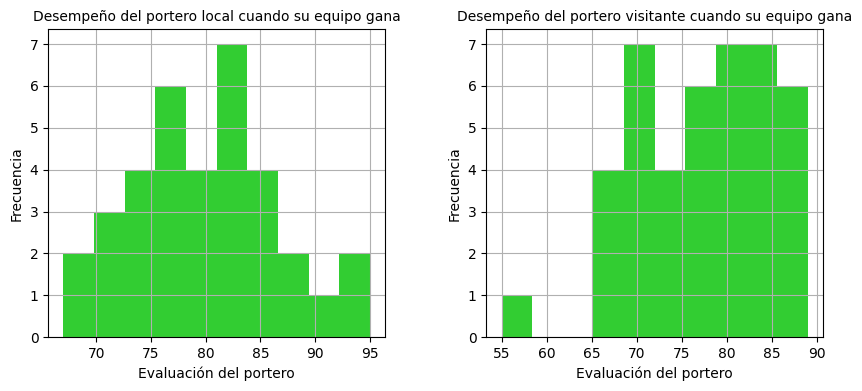

In [9]:
# calificaciones de los porteros cuando su equipo gana
plt.subplots(figsize=(10, 4))

fifa_penal[fifa['home_team_result']=='Win'].hist(column='home_team_goalkeeper_score',ax=plt.subplot(1,2, 1),color='limegreen')
plt.title('Desempeño del portero local cuando su equipo gana',size=10)
plt.xlabel('Evaluación del portero')
plt.ylabel('Frecuencia')

fifa_penal[fifa['home_team_result']=='Lose'].hist(column='away_team_goalkeeper_score',ax=plt.subplot(1, 2, 2),color='limegreen')
plt.title('Desempeño del portero visitante cuando su equipo gana',size=10)
plt.xlabel('Evaluación del portero')
plt.ylabel('Frecuencia')

plt.show()

<ipython-input-10-2b64f676b6d4>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  fifa_penal[fifa['home_team_result']=='Lose'].hist(column='home_team_goalkeeper_score', ax=plt.subplot(1,2, 1), color='indianred' )
<ipython-input-10-2b64f676b6d4>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  fifa_penal[fifa['home_team_result']=='Lose'].hist(column='home_team_goalkeeper_score', ax=plt.subplot(1,2, 1), color='indianred' )
<ipython-input-10-2b64f676b6d4>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  fifa_penal[fifa['home_team_result']=='Win'].hist(column='away_team_goalkeeper_score', ax=plt.subplot(1, 2, 2), color='indianred' )


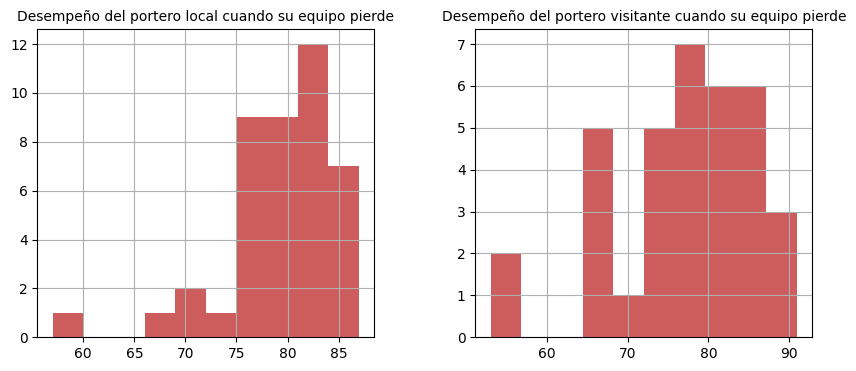

In [10]:
# calificaciones de los porteros cuando su equipo pierde
plt.subplots(figsize=(10, 4))

fifa_penal[fifa['home_team_result']=='Lose'].hist(column='home_team_goalkeeper_score', ax=plt.subplot(1,2, 1), color='indianred' )
plt.title('Desempeño del portero local cuando su equipo pierde',size=10)

fifa_penal[fifa['home_team_result']=='Win'].hist(column='away_team_goalkeeper_score', ax=plt.subplot(1, 2, 2), color='indianred' )
plt.title('Desempeño del portero visitante cuando su equipo pierde',size=10)
plt.show()

Visualmente no se observan diferencias significativas en el resultado del partido que dependan del desempeño del portero.

Se continua con una prueba de hipótesis sobre la igualdad de las medias de dos poblaciones. Para ello, se agrupan las calificaciones de los porteros donde su equipo ganó, sin importar si el equipo era local o visitante.

<ipython-input-11-fc691904586b>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  goalkeeper_score_win = fifa_penal[fifa['home_team_result']=='Win']['home_team_goalkeeper_score'].tolist()
<ipython-input-11-fc691904586b>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  goalkeeper_score_win += fifa_penal[fifa['home_team_result']=='Lose']['away_team_goalkeeper_score'].tolist()


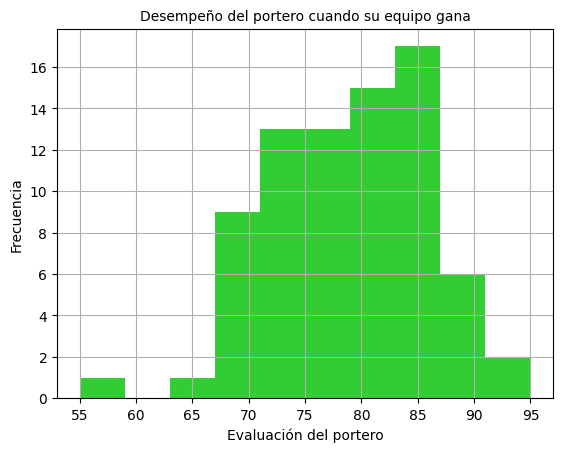

In [11]:
#desempeño del portero local cuando su equipo ganó
goalkeeper_score_win = fifa_penal[fifa['home_team_result']=='Win']['home_team_goalkeeper_score'].tolist()

#agregar desempeño del portero visitante cuando su equipo ganó
goalkeeper_score_win += fifa_penal[fifa['home_team_result']=='Lose']['away_team_goalkeeper_score'].tolist()

pd.Series(goalkeeper_score_win).hist(color='limegreen')
plt.title('Desempeño del portero cuando su equipo gana',size=10)
plt.xlabel('Evaluación del portero')
plt.ylabel('Frecuencia')
plt.show()

In [12]:
#Exportar datos en formato json para creacion de sitio web
pd.Series(goalkeeper_score_win).to_json(orient = 'columns')

'{"0":83.0,"1":81.0,"2":93.0,"3":95.0,"4":89.0,"5":76.0,"6":69.0,"7":76.0,"8":71.0,"9":88.0,"10":71.0,"11":82.0,"12":78.0,"13":80.0,"14":70.0,"15":79.0,"16":83.0,"17":82.0,"18":90.0,"19":85.0,"20":73.0,"21":77.0,"22":79.0,"23":85.0,"24":86.0,"25":77.0,"26":83.0,"27":74.0,"28":79.0,"29":73.0,"30":82.0,"31":85.0,"32":73.0,"33":67.0,"34":77.0,"35":70.0,"36":78.0,"37":69.0,"38":83.0,"39":88.0,"40":79.0,"41":77.0,"42":77.0,"43":76.0,"44":71.0,"45":55.0,"46":71.0,"47":86.0,"48":89.0,"49":83.0,"50":66.0,"51":87.0,"52":79.0,"53":68.0,"54":75.0,"55":71.0,"56":78.0,"57":79.0,"58":83.0,"59":81.0,"60":85.0,"61":82.0,"62":85.0,"63":83.0,"64":79.0,"65":73.0,"66":67.0,"67":71.0,"68":67.0,"69":69.0,"70":74.0,"71":86.0,"72":86.0,"73":79.0,"74":85.0,"75":78.0,"76":74.0}'

In [13]:
#Promedio
statistics.mean(goalkeeper_score_win)

78.35064935064935

<ipython-input-14-598581084417>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  goalkeeper_score_lose = fifa_penal[fifa['home_team_result']=='Lose']['home_team_goalkeeper_score'].tolist()
<ipython-input-14-598581084417>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  goalkeeper_score_lose += fifa_penal[fifa['home_team_result']=='Win']['away_team_goalkeeper_score'].tolist()


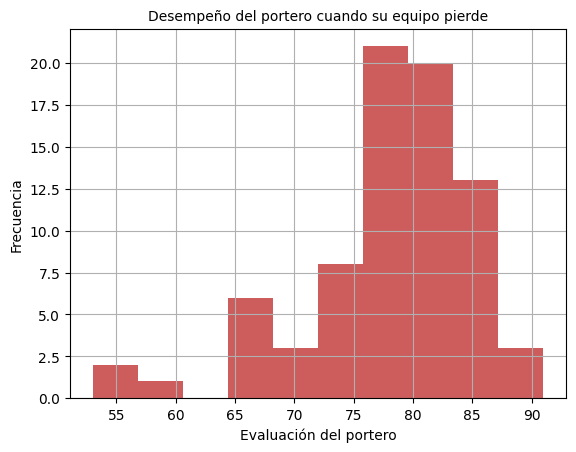

In [14]:
#desempeño del portero local cuando su equipo perdió
goalkeeper_score_lose = fifa_penal[fifa['home_team_result']=='Lose']['home_team_goalkeeper_score'].tolist()

#agregar desempeño del portero visitante cuando su equipo perdió
goalkeeper_score_lose += fifa_penal[fifa['home_team_result']=='Win']['away_team_goalkeeper_score'].tolist()

pd.Series(goalkeeper_score_lose).hist(color='indianred')
plt.title('Desempeño del portero cuando su equipo pierde',size=10)
plt.xlabel('Evaluación del portero')
plt.ylabel('Frecuencia')
plt.show()

In [15]:
#Exportar datos en formato json para creacion de sitio web
pd.Series(goalkeeper_score_lose).to_json(orient = 'columns')

'{"0":85.0,"1":78.0,"2":84.0,"3":87.0,"4":77.0,"5":77.0,"6":75.0,"7":77.0,"8":77.0,"9":86.0,"10":67.0,"11":77.0,"12":83.0,"13":81.0,"14":80.0,"15":77.0,"16":81.0,"17":80.0,"18":57.0,"19":82.0,"20":82.0,"21":73.0,"22":82.0,"23":79.0,"24":79.0,"25":84.0,"26":79.0,"27":79.0,"28":82.0,"29":78.0,"30":81.0,"31":77.0,"32":69.0,"33":69.0,"34":75.0,"35":81.0,"36":87.0,"37":86.0,"38":82.0,"39":82.0,"40":82.0,"41":79.0,"42":82.0,"43":67.0,"44":87.0,"45":90.0,"46":91.0,"47":66.0,"48":71.0,"49":83.0,"50":56.0,"51":87.0,"52":65.0,"53":81.0,"54":74.0,"55":78.0,"56":67.0,"57":77.0,"58":79.0,"59":76.0,"60":84.0,"61":83.0,"62":83.0,"63":53.0,"64":90.0,"65":83.0,"66":77.0,"67":87.0,"68":75.0,"69":68.0,"70":87.0,"71":72.0,"72":79.0,"73":86.0,"74":79.0,"75":73.0,"76":74.0}'

In [16]:
#Promedio
statistics.mean(goalkeeper_score_lose)

78.24675324675324

Para responder la pregunta, se hace una prueba de t de Student que mide si hay una diferencia significativa entre los promedios (prueba de hipótesis sobre la igualdad de medias).

Para esto se usan 2 hipótesis donde:

- La primera nula establece que los promedios de las calificaciones son iguales.
- La hipótesis alterna establece que los promedios de las calificaciones son diferentes.

En base a los graficos anteriores, se considera que las
varianzas de las poblaciones son iguales.

In [17]:
# Prueba de hipótesis sobre la igualdad de las medias de dos poblaciones
alpha = 0.05 #nivel de significancia estadística crítica

results = st.ttest_ind(goalkeeper_score_win, goalkeeper_score_lose)
print('p-value: ', results.pvalue)
if results.pvalue < alpha:  print("Se rechaza la hipótesis nula")
else: print("No se rechaza la hipótesis nula")

p-value:  0.9304364213656416
No se rechaza la hipótesis nula


Se obtiene un valor p de 0.93 que significa que es muy probable que la primera hipótesis sea cierta; es decir, el desempeño de los porteros cuando su equipo gana, es igual al desempeño de los porteros cuyo equipo pierde.


## Conclusión
Algunos pensarían que en los partidos perdidos donde hubo ronda de penaltis el portero debería tener una peor calificación, pero no es así, porque su desempeño fue igual de bueno que cuando el equipo gana. Así que no podemos culpar de todo al portero cuando su equipo pierde… ahora que lo pienso, tengo que sacar de la basura la playera de mi portero favorito… espero que siga ahí.